<h2>---- DATA CLEANING AND STANDARDIZATION ----  </h2>

In [1]:
# Importing necessary modules
import pandas as pd 
df = pd.read_excel("SkillGap.xlsx")

In [2]:
# Accesing first 5 rows to inspect the data
print("First 5 rows")
print(df.head())

First 5 rows
  EmployeeID   CurrentSkill ProficiencyLevel ProjectSkillRequired  Gap
0         E0  Data Analysis         Beginner               Python   No
1         E1            SQL         Beginner               Python   No
2         E2          Excel     Intermediate                 Java   No
3         E3           Java         Advanced                  SQL  Yes
4         E4  Data Analysis         Beginner                 Java   No


In [3]:
# Checking for null values
print("\n Checking Null values")
df.isnull().sum()


 Checking Null values


EmployeeID              0
CurrentSkill            0
ProficiencyLevel        0
ProjectSkillRequired    0
Gap                     0
dtype: int64

In [4]:
# Convert CurrentSkill and ProjectSkillRequired to uppercase
df['CurrentSkill'] = df['CurrentSkill'].str.upper()
df['ProjectSkillRequired'] = df['ProjectSkillRequired'].str.upper()
# Checking changes in data
print("First 5 rows after converting to UPPERCASE")
print(df.head())

First 5 rows after converting to UPPERCASE
  EmployeeID   CurrentSkill ProficiencyLevel ProjectSkillRequired  Gap
0         E0  DATA ANALYSIS         Beginner               PYTHON   No
1         E1            SQL         Beginner               PYTHON   No
2         E2          EXCEL     Intermediate                 JAVA   No
3         E3           JAVA         Advanced                  SQL  Yes
4         E4  DATA ANALYSIS         Beginner                 JAVA   No


<h2>----  Core Metric Calculation ---- </h2>

In [5]:
# Calculate overall skill gap rate
total_employees = len(df)
employees_with_gap = df[df["Gap"].str.upper() == "YES"].shape[0]

skill_gap_rate = (employees_with_gap / total_employees) * 100
print(f"Overall Skill Gap Rate: {skill_gap_rate}%")

Overall Skill Gap Rate: 40.53%


In [6]:
# Filter employees who have a skill gap
employees_gap_df = df[df["Gap"].str.upper() == "YES"]

# Preview first few rows
print("Employees with a skill gap:")
print(employees_gap_df.head())

Employees with a skill gap:
   EmployeeID   CurrentSkill ProficiencyLevel ProjectSkillRequired  Gap
3          E3           JAVA         Advanced                  SQL  Yes
6          E6          EXCEL     Intermediate               PYTHON  Yes
7          E7  DATA ANALYSIS         Beginner                   ML  Yes
8          E8         PYTHON         Advanced                   ML  Yes
10        E10          EXCEL     Intermediate                 JAVA  Yes


**Insight:** Most skill gaps involve moving from general, non-programming tools such as Excel and basic data analysis to technical, programming, and AI-oriented skills such as Python, Machine Learning (ML), Java, and SQL.

In [7]:
# Count the most in-demand project skills
top_skills = df["ProjectSkillRequired"].value_counts()

print("\nTop 5 Most In-Demand Project Skills:")
print(top_skills.head(5))


Top 5 Most In-Demand Project Skills:
ProjectSkillRequired
SQL       2553
PYTHON    2505
ML        2478
JAVA      2464
Name: count, dtype: int64


<h2>---- Proficiency Level Analysis & Visualization ---- </h2>

In [8]:
# Convert Gap column to binary (1 = Yes, 0 = No)
df['GapBinary'] = df['Gap'].apply(lambda x: 1 if x == 'Yes' else 0)

# Group by ProficiencyLevel and calculate gap rate
gap_rates = df.groupby('ProficiencyLevel')['GapBinary'].mean().reset_index()
gap_rates.rename(columns={'GapBinary': 'GapRate'}, inplace=True)

print("Gap Rates by Proficiency Level:")
print(gap_rates)

Gap Rates by Proficiency Level:
  ProficiencyLevel   GapRate
0         Advanced  0.418994
1         Beginner  0.401922
2     Intermediate  0.394495


**Insight:** Skill gaps exist across all proficiency levels, with Advanced employees showing the highest gap rate. Training programs should focus on aligning employee skills with project requirements rather than just increasing proficiency.


<Axes: xlabel='ProficiencyLevel', ylabel='GapRate'>

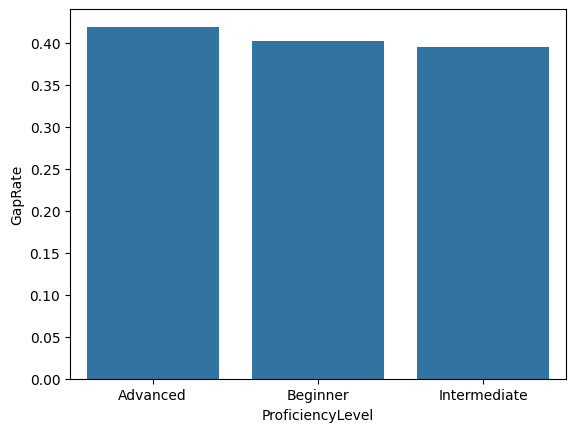

In [9]:
import seaborn as sns
sns.barplot(x=gap_rates['ProficiencyLevel'],y=gap_rates['GapRate'])

<h2>---- Skill Transition Heatmap ---- </h2>

In [10]:
import pandas as pd

skill_matrix = pd.crosstab(
    df['CurrentSkill'],
    df['ProjectSkillRequired']
)
print(skill_matrix)

ProjectSkillRequired  JAVA   ML  PYTHON  SQL
CurrentSkill                                
DATA ANALYSIS          421  422     418  412
EXCEL                  406  418     421  418
JAVA                   408  411     379  410
ML                     386  405     414  440
PYTHON                 424  423     435  442
SQL                    419  399     438  431


**Insight:** The skill matrix shows that employees across all current skills need training to meet project requirements. Cross-training in Python, SQL, and ML should be prioritized, as these skills are in high demand across projects.


Text(50.72222222222221, 0.5, 'Current Skill')

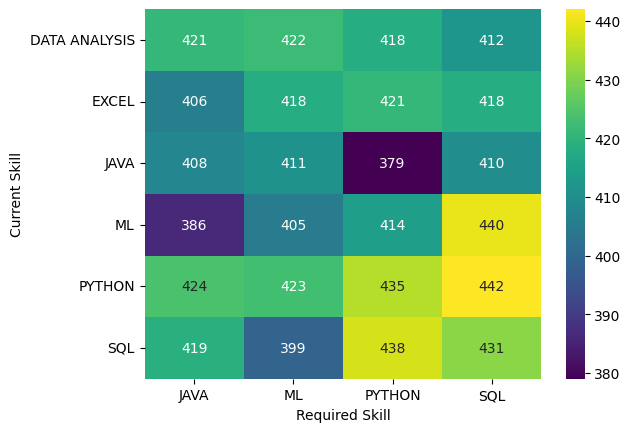

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(skill_matrix,annot=True , fmt = 'd',cmap = 'viridis')
plt.xlabel('Required Skill')
plt.ylabel('Current Skill')

In [12]:
df.to_csv('CleanedSkillGap.csv', index=False)

In [13]:
# Convert Gap column to binary (1 = Yes, 0 = No)
df['SkillGapCount'] = df['Gap'].apply(lambda x: 1 if x == 'Yes' else 0)

# Group by ProficiencyLevel and calculate gap rate
gap_rates = df.groupby('ProjectSkillRequired')['SkillGapCount'].mean().reset_index()
gap_rates.rename(columns={'SkillGapCount': 'Skill_GapCount'}, inplace=True)

print("Gap Rates by Proficiency Level:")
print(gap_rates)

Gap Rates by Proficiency Level:
  ProjectSkillRequired  Skill_GapCount
0                 JAVA        0.409091
1                   ML        0.417676
2               PYTHON        0.396407
3                  SQL        0.398355


**Insight:** Skill gaps vary across project skills, with the highest gap observed in Machine Learning (41.8%), followed by JAVA, SQL, and Python. Targeted training in ML and JAVA should be prioritized to align employee skills with project requirements.
